### This notebook demonstrates detrending of movie data for fluctuation analysis
Fluorescence fluctuation analysis (including N&B analysis) relies on the variance of the movie at each pixel.  The variance from molecular diffusion can be quite low so other sources of variance like bleaching or cell movement need to be eliminated to avoid their influence.  This code fits every pixel of a stack of images to a series of linear functions and then subtracts them from the stack.  The average image intensity can be added back to restore the original image intensity.

In [1]:
#this notebook does segmented linear detrending of stacks
import numpy as np
import matplotlib.pyplot as plt
import tifffile
import analysis_utils as autils
#import scipy.stats as ss

In [2]:
#read in our movie (produced in the sim_movie_confined_bleaching notebook)
stack=tifffile.imread('movie_confined_bleaching.tif')
#get the first channel for detrending
stack=stack[:,0,:,:]
stack.shape

(256, 128, 128)

In [3]:
detrended=autils.detrendStackLinearSeg(stack,segments=1,maintain_intensity=True)

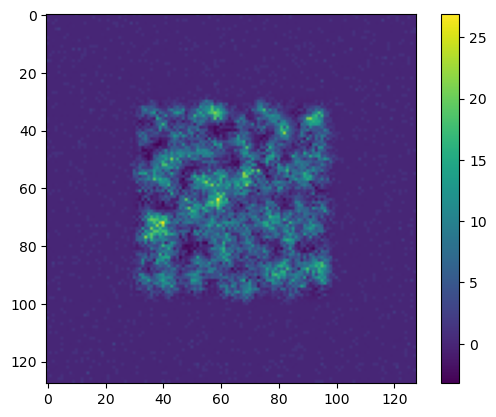

In [4]:
plt.imshow(detrended[0])
plt.colorbar()

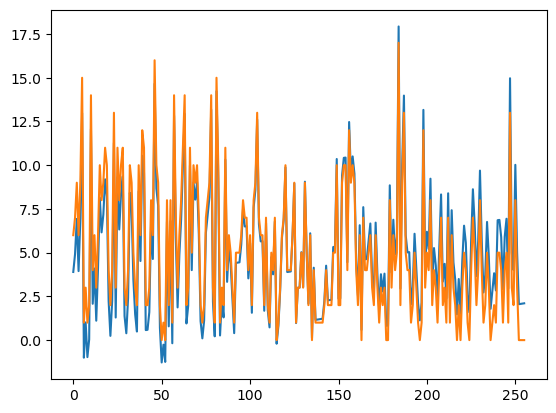

In [5]:
#show one of the detrended series
xi=64
yi=64
plt.plot(detrended[:,yi,xi])
plt.plot(stack[:,yi,xi])
plt.show()

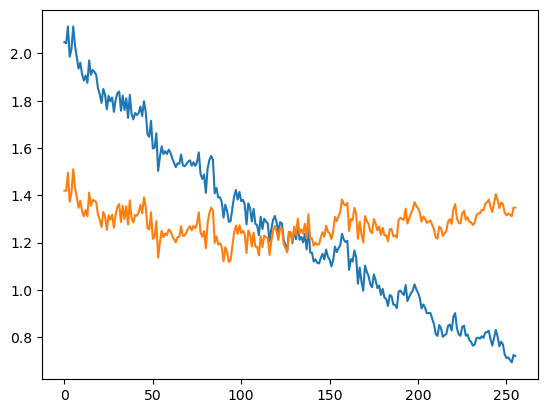

In [6]:
plt.plot([frame.mean() for frame in stack])
plt.plot([frame.mean() for frame in detrended])

In [7]:
tifffile.imwrite('movie_confined_bleaching_detrend.tif',detrended)